In [1]:
import pandas as pd

import os

# task1

### merging 12 months of sales data into a single file

In [2]:
# 
df = [files for files in os.listdir('./Sales_Data')]

all_month_data2 = pd.DataFrame()

for file in df:
    
    df =  pd.read_csv("./Sales_Data/"+file)
    all_month_data2 = pd.concat([all_month_data2 , df])

all_month_data2.to_csv("all_data2.csv", index = True)
    
        
    
    


#  now we have to read updated dataframe

In [3]:
all_data = pd.read_csv("all_data2.csv")

all_data.head()

# so now we have a new dataset

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Augment data with additional columns

In [4]:
## the fisrt column we want to add is sale column 

#  Task2: Add Month column:-

In [5]:
# nan_df = all_data(all_data.isna().any(axis=1))
nan_df = all_data[all_data.isna().any(axis=1)] # this will show all the NAN values
nan_df.head()

all_data = all_data.dropna(how = 'any') # When set to 'all', it means that a row will only be removed if all its values are NaN.
                                        # When set to any it startted working
all_data.head()

# here we have dropped the all the NAN values because it was showing an error

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
# now its time to solve new error that is arising 

# ValueError: invalid literal for int() with base 10: 'Or' this means that letter OR is in the first two digits of the string

# temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or'] # so this line of code will give us values that are equal to 'OR'

# temp_df = all_data[all_data['Order Date'].str[0:2] != 'Or'] 
# the above line of code will give us rows which are not equal to 'OR' and thats what we want




# now we want this stored in all_data

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or'] # this will store the new data in all_data

# all_data




In [7]:
# here iam trying to solve the problem that there is a number and a string that cant  multiply together

In [8]:
# convert columns to the correct type

# all_data['Quantity Ordered'] (we need to make to int)

# all_data['price Each'] ( make it a float)

all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)

all_data['Price Each'] = all_data['Price Each'].astype(float)

In [9]:
# ////////////////////////------------------------------------------------------

In [10]:
all_data['Month'] = all_data["Order Date"].str[0:2] # this will cut the the two number 

all_data['Month'] = all_data['Month'].astype('int32') # this will convert it to int

all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4




# Clean up the data!
### right now we have NAN values in the data, and we need to clear it..

in order to do that we need to drop NAN values 

### Drop rows of NAN

#  Dont get confused why i commented this out because i have moved it to the above column

In [11]:
# # nan_df = all_data(all_data.isna().any(axis=1))
# nan_df = all_data[all_data.isna().any(axis=1)] # this will show all the NAN values
# nan_df.head()

# all_data = all_data.dropna(how = 'all') # When set to 'all', it means that a row will only be removed if all its values are NaN.

# all_data.head()

# # here we have dropped the all the NAN values because it was showing an error

# Question = 1: what was the best month for sale? How much was earned that month?

In [12]:
# to calculate the sales we need price and quantity
# and to calculate the highest sales we need to use group 

# add a sales column

# i guess this is showing an error [TypeError: can't multiply sequence by non-int of type 'str']
#here is an attempt to perform a multiplication operation involving a sequence (likely a string) and a non-integer (a string), which is not allowed in Python.


all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [13]:
# now its time to look whats the best month for sale

# for this we have to use groupby

result =   all_data.groupby('Month').sum() # this will groupby the month and sum up all the values

C:\Users\Admin\AppData\Local\Temp\ipykernel_5088\3828022287.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result =   all_data.groupby('Month').sum() # this will groupby the month and sum up all the values


# it will be easier to see if we use visualization for this data for analysis

In [14]:
import matplotlib.pyplot as plt

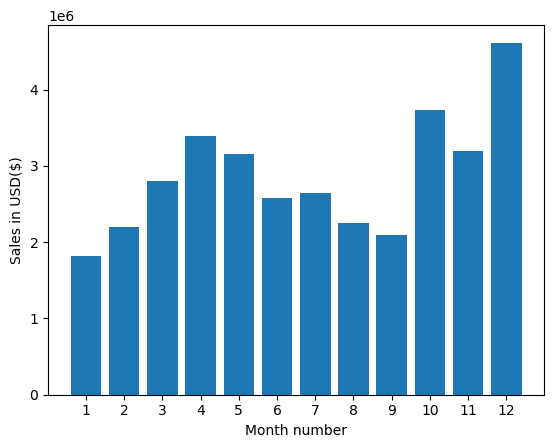

In [15]:
months = range(1,13) # this is exclusive so it would not include 13

plt.bar(months,result['Sales'])

plt.xticks(months)

plt.ylabel('Sales in USD($)')

plt.xlabel('Month number')

plt.show()

# so the sale in 12 means december got increased because all the holidays are in december like christmas.. 

# 

# 

# ****************  end of first question *******

# 

# question = 2

##  what city had the highest number of sales?

## in order to do that we need to add city column

In [16]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x)+')')

all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


# now we have column where we have seperated the sapces

In [17]:
# What city had the highest number of sales?

In [18]:
# results = all_data.groupby('Month').sum()

In [19]:
results = all_data.groupby('City').sum()
results

C:\Users\Admin\AppData\Local\Temp\ipykernel_5088\2386508471.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('City').sum()


,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales
City,,,,,
Atlanta (GA),122928154,16602,2779908.20,104794,2795498.58
Austin (TX),82709457,11153,1809873.61,69829,1819581.75
Boston (MA),165758780,22528,3637409.77,141112,3661642.01
Dallas (TX),124308328,16730,2752627.82,104620,2767975.40
Los Angeles (CA),247743297,33289,5421435.23,208325,5452570.80
New York City (NY),208439450,27932,4635370.83,175741,4664317.43
Portland (ME),20641344,2750,447189.25,17144,449758.27
Portland (OR),83402354,11303,1860558.22,70621,1870732.34
San Francisco (CA),372569180,50239,8211461.74,315520,8262203.91


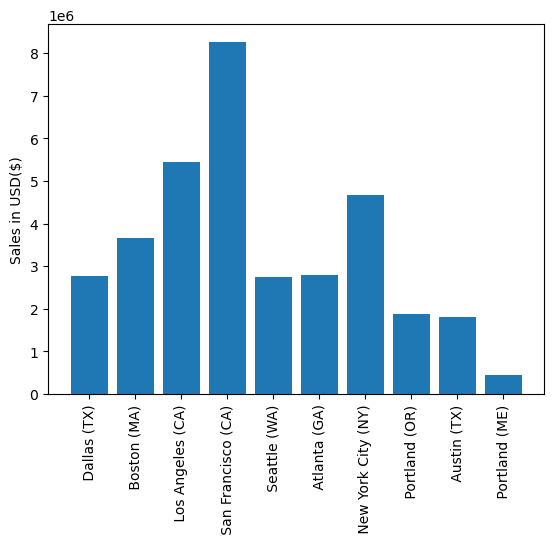

In [20]:
import matplotlib.pyplot as plt

# Check for duplicate cities and aggregate sales data if necessary
unique_cities = all_data['City'].unique()
sales_by_city = []
for city in unique_cities:
    total_sales = all_data[all_data['City'] == city]['Sales'].sum()
    sales_by_city.append(total_sales)

# Now, both unique_cities and sales_by_city should have the same length
# Create the bar plot
plt.bar(unique_cities, sales_by_city)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.ylabel('Sales in USD($)')
plt.show()


In [21]:
# why is San Francisco has highest number of  sales?

# this is a electronic , advertisement effects ,  maybe income

# 

#  Question 3: What time should we display advertisement to maximize the likelihood of customer's buying products?

In [22]:

# in order to do that what we need is  convert this (ORDER DATE) which is in string into date-time
# so what i did was first seperated hours and minutes in the different column 
# because they tell at what time sales where happening
# then i used group by and sumed them

In [23]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [24]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


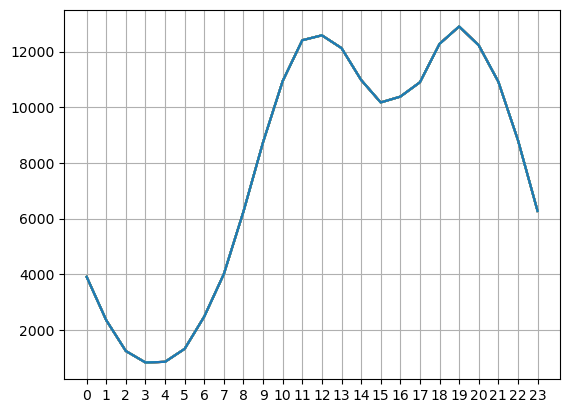

In [25]:
hour = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hour, all_data.groupby(['Hour']).count())

plt.xticks(hour)

plt.grid()

plt.show()


# plt.plot(hour,all_data.groupby(['Hour']).count())




In [26]:
# question still remains which hour is the best..

# so the graph peaks at 11am and 19pm

# these are the peak times where people make orders

# so i guess right before the sales start droppping it will be a good time show advertisement...

# right before 11-12 am it will be a good time 

# Question:4 =  what products are most often sold together

In [27]:
# how do we know that products are sold together?
# if they have the ame order id that means they definetely sold together


# lets create a new dataframe for it

In [28]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]
# i want to create new column in dataframe and call it group

df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x) )

# so what i did here was that i grouped by the  order id  and once the id got grouped by then i took the product column then i joined them 


C:\Users\Admin\AppData\Local\Temp\ipykernel_5088\2853902253.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x) )


In [29]:
df

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,grouped
3,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186792,11628,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20,18,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,11639,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0,25,"Wired Headphones,AAA Batteries (4-pack)"
186804,11640,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0,25,"Wired Headphones,AAA Batteries (4-pack)"
186841,11677,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13,49,"Google Phone,USB-C Charging Cable"


In [30]:
# the problem that we have encountered is that two same things are coming here together

# 3	3	176560	Google Phone	1	600.00	2019-04-12 14:38:00	669 Spruce St, Los Angeles, CA 90001	4	600.00	Los Angeles (CA)	14	38	Google Phone,Wired Headphones
# 4	4	176560	Wired Headphones	1	11.99	2019-04-12 14:38:00	669 Spruce St, Los Angeles, CA 90001	4	11.99	Los Angeles (CA)	14	38	Google Phone,Wired Headphones

In [31]:
# now iam solving the above problem 

df = df[['Order ID', 'grouped']].drop_duplicates()

df.head()


,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [32]:
# concept reference = https://chat.openai.com/share/b46e4d6f-a164-418f-8e9b-987e20ae76a4

# here iam trying to create which pairs come most frequently 
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

# count.most_common(10) # it will return 10 most common elememt
for key, value in count.most_common(10):
    print(key,value)



    


    
    
    
    
    

    




('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [33]:
# from collections import Counter

# count = Counter()

# items = ['apple', 'banana', 'apple', 'orange', 'banana', 'apple']
# count.update(items)

# print(count)


In [34]:
# from itertools import combinations

# # create a list of items

# items = ['A','B','C','D']

# pairs = list(combinations(items,2))

# # Print the pairs

# pairs

In [35]:
# for pair in pairs:
#     print(pair)

# what product sold the most and why it sold the most??


In [36]:
all_data.head(3)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38


C:\Users\Admin\AppData\Local\Temp\ipykernel_5088\4283466903.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


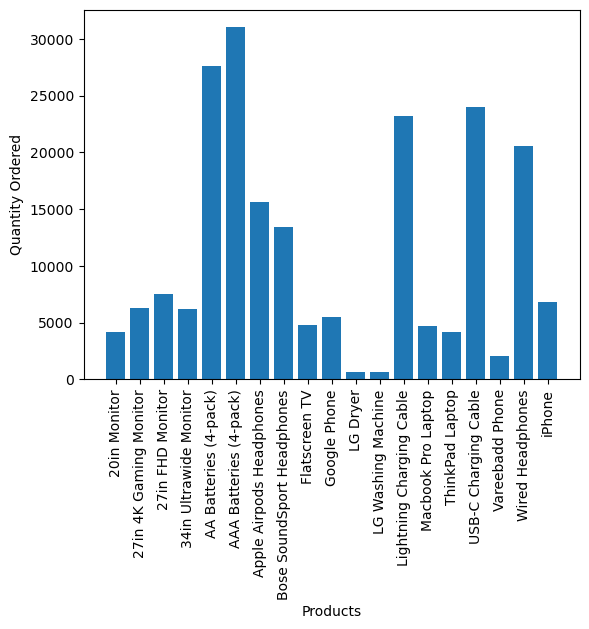

In [37]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products,quantity_ordered)

plt.xticks(rotation=90)

plt.xlabel("Products")

plt.ylabel("Quantity Ordered")

plt.show()





# AAA Batteries sold the most

## these items are cheap

## also these are of regular use , they are used regularly

# 

# 

C:\Users\Admin\AppData\Local\Temp\ipykernel_5088\3394345116.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
C:\Users\Admin\AppData\Local\Temp\ipykernel_5088\3394345116.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical',size = 8)


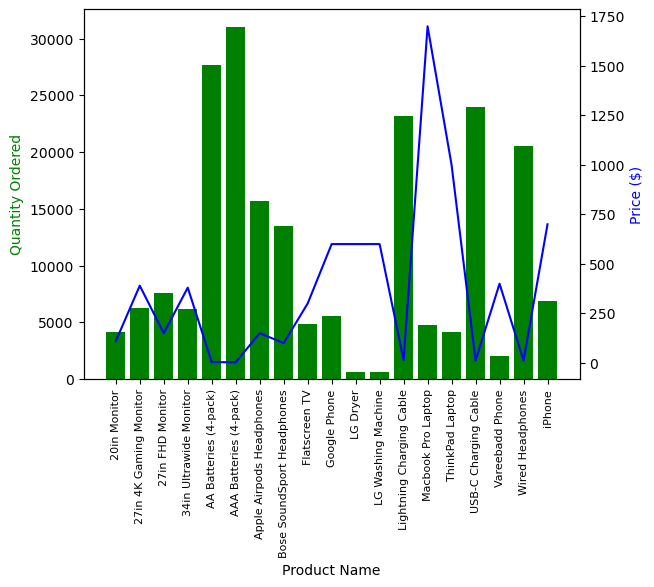

In [38]:
prices = all_data.groupby('Product').mean()['Price Each']

# trying to add things on other axis:-

fig,ax1 = plt.subplots() # subplot (a single plot within the figure)

ax2 = ax1.twinx() #ax2 = ax1.twinx() is used in Matplotlib to create a new Axes 
ax1.bar(products,quantity_ordered,color = 'g')
ax2.plot(products,prices,'-b')


ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color = 'g')
ax2.set_ylabel('Price ($)', color = 'b')
# plt.xticks(rotation=90)
ax1.set_xticklabels(products, rotation = 'vertical',size = 8)

plt.show()






In [39]:
# so our hypothesis was whenever there is high sale, the price must be low

# and this graph also proves this point

# also there are some inconsistency 